# Activity 03: Exploring Apple Photos

You may not know this, but anytime you take a photo on your iPhone, a lot of machine learning goes on behind the scenes to determine loads of information about the photo. Where it was taken, what's in it, and even how good of a photo it is.

A data scientist built a tool to extract all that information from any Apple Photos database and put it into a more readable format. The tools is called dogsheep photos, and is available to install on your Mac: https://github.com/dogsheep/dogsheep-photos. For today, we'll use about 500 or so of his photos to explore the information that an Apple Photos database contains. All information has come from: https://dogsheep-photos.dogsheep.net/ which is a publically available database of photos from Simon Willison, the author of Dog Sheep Photos.

## Getting Started

Get started by running the code below to load in all the table operations you learned about in Lesson 03: Tables and Intro to Python. These table operations are not built into the standard Python library of tools, so we need to import them all from the `datascience` Python module, which is maintained by UC-Berkeley. You can do this by running the cell below. You'll see this code reappear quite a bit in this course!

In [1]:
from datascience import *

Now, we need to load up some information on the photos. We'll create two tables, `photos` which will contain almost all the metadata about the photos, and `labels` which contains additional information about what Apple thinks the photo is of (person, animal, tree, etc.)

In [2]:
photos = Table.read_table('data/apple_photos.csv')
labels = Table.read_table('data/apple_labels.csv')

### The `photos` Table

Let's take a look at what we're working with in the `photos` table. Run the cell below to see the first 10 rows of this table, and all of the columns. You can scroll to the right to see all the columns. We'll often call the column labels, "attributes" or "features" of the data contained in each row.

In [3]:
photos

rowid,photo,uuid,date,albums,persons,ext,sha256,size,latitude,longitude,favorite,portrait,screenshot,slow_mo,time_lapse,hdr,selfie,panorama,place_city,place_state_province,place_country,ZUUID,ZOVERALLAESTHETICSCORE,ZCURATIONSCORE,ZPROMOTIONSCORE,ZHIGHLIGHTVISIBILITYSCORE,ZBEHAVIORALSCORE,ZFAILURESCORE,ZHARMONIOUSCOLORSCORE,ZIMMERSIVENESSSCORE,ZINTERACTIONSCORE,ZINTERESTINGSUBJECTSCORE,ZINTRUSIVEOBJECTPRESENCESCORE,ZLIVELYCOLORSCORE,ZLOWLIGHT,ZNOISESCORE,ZPLEASANTCAMERATILTSCORE,ZPLEASANTCOMPOSITIONSCORE,ZPLEASANTLIGHTINGSCORE,ZPLEASANTPATTERNSCORE,ZPLEASANTPERSPECTIVESCORE,ZPLEASANTPOSTPROCESSINGSCORE,ZPLEASANTREFLECTIONSSCORE,ZPLEASANTSYMMETRYSCORE,ZSHARPLYFOCUSEDSUBJECTSCORE,ZTASTEFULLYBLURREDSCORE,ZWELLCHOSENSUBJECTSCORE,ZWELLFRAMEDSUBJECTSCORE,ZWELLTIMEDSHOTSCORE
280,"{""img_src"":""https://photos.simonwillison.net/i/864ec4f46 ...",17AF724E-5561-4DF0-877F-DE60DBBBA8B9,2020-05-19T04:34:48+00:00,"[""Public""]","[""Natalie Downe""]",jpeg,864ec4f46779b8892961f816730c9b2945989731f1506bc835f9a322 ...,8346279,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
68,"{""img_src"":""https://photos.simonwillison.net/i/1eb3a357d ...",63ED2057-1E46-45AF-9F7D-1DE5F84BEBFD,2020-05-19T04:32:54+00:00,"[""Public""]",[],jpeg,1eb3a357d57391efeec21aed767c395645bfa2bb882d75ce85c7dfa4 ...,8794906,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
163,"{""img_src"":""https://photos.simonwillison.net/i/502fbb347 ...",70B3C358-DA0D-469F-B667-F0045F445AC6,2020-05-19T04:31:43+00:00,"[""Public""]",[],heic,502fbb347dc72fbffbddb7b92326f6ddbeb6d27a77d9761fb5406bd5 ...,1070208,37.7709,-122.477,1,0,0,0,0,0,0,0,San Francisco,CA,United States,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
427,"{""img_src"":""https://photos.simonwillison.net/i/d8a8d9d59 ...",1FADC083-2278-4D40-A8A0-45AF6D47458F,2020-05-16T22:15:20+00:00,"[""Public""]",[],jpeg,d8a8d9d590e25d16c5f1da8a29d2c4cc42d0c8028145f604a5f9292c ...,7218635,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
57,"{""img_src"":""https://photos.simonwillison.net/i/1bb184872 ...",086ADA1B-8C59-41F1-88C3-49A6ABEEDF60,2020-05-15T21:57:58+00:00,"[""Public""]",[],heic,1bb184872fa6a61afc7e3629b45f57f161065b283d2005c2699242ca ...,4686204,37.6113,-122.496,1,0,0,0,0,0,0,0,Pacifica,CA,United States,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
76,"{""img_src"":""https://photos.simonwillison.net/i/2255b2c89 ...",C4D15F2D-8571-447F-B195-05FCDD09A6B5,2020-05-07T16:53:21+00:00,"[""Photography photo essay"", ""Public""]",[],jpeg,2255b2c89fd53713fbe7619b0cf93798b616f09ec8f70bf4463571d9 ...,5833242,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
476,"{""img_src"":""https://photos.simonwillison.net/i/f3c765416 ...",6ABAD7FA-24CD-4ED7-BB76-6EECB1CCCACC,2020-05-07T16:52:48+00:00,"[""Photography photo essay"", ""Public""]",[],jpeg,f3c765416273a026a566354bccde331bb60228cba6e23452aad503dd ...,5120721,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
344,"{""img_src"":""https://photos.simonwillison.net/i/a70e4feeb ...",B4E86A08-9A42-4CD8-B609-0C5F2FDC1C1A,2020-05-07T16:45:25+00:00,"[""Photography photo essay"", ""Public""]",[],jpeg,a70e4feebebb39ea1227431432c17a6bc62ea261912e6aa121142839 ...,8385771,nan,nan,1,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
425,"{""img_src"":""https://photos.simonwillison.net/i/d840616a2 ...",B05A77E3-990A-

There are a lot of attributes in this table! Let's just keep a few to work with:

* photo
* uuid
* date
* place_city
* place_state_province
* place_country
* ZOVERALLAESTHETICSCORE
* pick another 1 or 2 that you're interested in exploring

Modify the cell below so you're selecting only the attributes / columns in the list above, plus one or two that you think might be interesting. Be sure to either copy/paste the labels or type very carfully. **Remember:** LaBeLs ArE cAsE sEnSiTiVe!

In [4]:
# You complete some code in this cell
my_photos = photos.select('photo', 'uuid', 'ZOVERALLAESTHETICSCORE')
my_photos

photo,uuid,ZOVERALLAESTHETICSCORE
"{""img_src"":""https://photos.simonwillison.net/i/864ec4f46 ...",17AF724E-5561-4DF0-877F-DE60DBBBA8B9,nan
"{""img_src"":""https://photos.simonwillison.net/i/1eb3a357d ...",63ED2057-1E46-45AF-9F7D-1DE5F84BEBFD,nan
"{""img_src"":""https://photos.simonwillison.net/i/502fbb347 ...",70B3C358-DA0D-469F-B667-F0045F445AC6,nan
"{""img_src"":""https://photos.simonwillison.net/i/d8a8d9d59 ...",1FADC083-2278-4D40-A8A0-45AF6D47458F,nan
"{""img_src"":""https://photos.simonwillison.net/i/1bb184872 ...",086ADA1B-8C59-41F1-88C3-49A6ABEEDF60,nan
"{""img_src"":""https://photos.simonwillison.net/i/2255b2c89 ...",C4D15F2D-8571-447F-B195-05FCDD09A6B5,nan
"{""img_src"":""https://photos.simonwillison.net/i/f3c765416 ...",6ABAD7FA-24CD-4ED7-BB76-6EECB1CCCACC,nan
"{""img_src"":""https://photos.simonwillison.net/i/a70e4feeb ...",B4E86A08-9A42-4CD8-B609-0C5F2FDC1C1A,nan
"{""img_src"":""https://photos.simonwillison.net/i/d840616a2 ...",B05A77E3-990A-4C34-8524-9B1A407076D4,nan
"{""img_src"":""https://photos.simonwillison.net/i/447a9f051 ...",1F2AB404-400E-4CF9-8D71-00BF4D0FD1F6,nan


Explore this data set. Some questions to consider:

1. What does Apple think is the "best" photo as measured by it's aesthetic score, contained in `ZOVERALLAESTHETICSCORE`?
2. How many photos were taken in the country of France? The city of Sausalito?
3. **Find something that you think is interesting and post about it to the Activity 2 thread in the EdSTEM discussion board.**

### The `labels` table

Start by looking at what the `labels` table contains:

In [5]:
labels

id,uuid,groupid,category,owning_groupid,content_string,normalized_string,lookup_identifier
1179,DEA5349B-F370-47FA-97E1-5ABAEED723AD,161,2055,0,Favorites,favorites,nan
1180,DEA5349B-F370-47FA-97E1-5ABAEED723AD,3,2030,0,Spring,spring,nan
1181,DEA5349B-F370-47FA-97E1-5ABAEED723AD,4,1014,0,April,april,nan
1182,DEA5349B-F370-47FA-97E1-5ABAEED723AD,5,1015,0,2020,2020,nan
1183,DEA5349B-F370-47FA-97E1-5ABAEED723AD,162,2056,0,IMG_0523.JPG,img_0523.jpg,nan
12048,92A798FF-8270-42BA-967F-41C0B3CB86DF,161,2055,0,Favorites,favorites,nan
12049,92A798FF-8270-42BA-967F-41C0B3CB86DF,296,2024,0,Outdoor,outdoor,nan
12050,92A798FF-8270-42BA-967F-41C0B3CB86DF,295,2024,0,Land,land,nan
12051,92A798FF-8270-42BA-967F-41C0B3CB86DF,313,2024,0,Mammal,mammal,nan
12052,92A798FF-8270-42BA-967F-41C0B3CB86DF,1591,2024,0,Seal,seal,nan


Let's only keep the `uuid` and `normalized_string` columns, the rest won't be too interesting:

In [6]:
my_labels = labels.select('uuid', 'normalized_string')
my_labels

uuid,normalized_string
DEA5349B-F370-47FA-97E1-5ABAEED723AD,favorites
DEA5349B-F370-47FA-97E1-5ABAEED723AD,spring
DEA5349B-F370-47FA-97E1-5ABAEED723AD,april
DEA5349B-F370-47FA-97E1-5ABAEED723AD,2020
DEA5349B-F370-47FA-97E1-5ABAEED723AD,img_0523.jpg
92A798FF-8270-42BA-967F-41C0B3CB86DF,favorites
92A798FF-8270-42BA-967F-41C0B3CB86DF,outdoor
92A798FF-8270-42BA-967F-41C0B3CB86DF,land
92A798FF-8270-42BA-967F-41C0B3CB86DF,mammal
92A798FF-8270-42BA-967F-41C0B3CB86DF,seal


Let's create a table with observations where the photos contain a pelican. These rows will have the string `'pelican'` in the column labeled `normalized_string`. We'll call this table  `pelican_uuid`, because we are interested in using the UUID to match it back to our `my_photos` table, which has a lot more information on the photo. 

Complete the code below to create the table as described above. It should contain the columns `uuid` and `normalized_string` and only contain data about the photos that contain pelicans.

In [7]:
# You complete some code in this cell
pelican_uuid = my_labels.where('normalized_string', 'pelican')
pelican_uuid

uuid,normalized_string
01CEBCA2-922B-407C-A726-95D9E0EAB31C,pelican
08D18A51-8004-4F00-B79E-4AA1628FB111,pelican
0A9EB544-AC29-4D70-BDD2-4DF2E53D6E1A,pelican
1B6765D2-F281-48DB-A23A-C081FFAC69DC,pelican
2B4AD4FE-BEB7-4E86-84B4-2BEBA79615F7,pelican
2C40753A-80EB-4B9E-B0C4-678E61A06C55,pelican
398058A8-F11E-4306-8272-05A438B6E523,pelican
41CFBC2A-16F0-4F09-9A9F-5B83AA554B1D,pelican
429A1239-744D-4A61-A33B-1BF261584128,pelican
46ABC862-9837-404A-832B-4158270704FF,pelican


## What's the best pelican photo?

The code below will create a new table, `pelican_photos` which has all the information found in `my_photos`, but only for the photos we found in the `pelican_uuid` table. 

Don't worry about what this code is doing. Just run it and see how the table is structured.

In [8]:
pelican_photos = my_photos.join( 'uuid', pelican_uuid)
pelican_photos

uuid,photo,ZOVERALLAESTHETICSCORE,normalized_string
01CEBCA2-922B-407C-A726-95D9E0EAB31C,"{""img_src"":""https://photos.simonwillison.net/i/83667863d ...",0.657227,pelican
08D18A51-8004-4F00-B79E-4AA1628FB111,"{""img_src"":""https://photos.simonwillison.net/i/7e284f6fd ...",0.78125,pelican
0A9EB544-AC29-4D70-BDD2-4DF2E53D6E1A,"{""img_src"":""https://photos.simonwillison.net/i/4f164a611 ...",0.617188,pelican
1B6765D2-F281-48DB-A23A-C081FFAC69DC,"{""img_src"":""https://photos.simonwillison.net/i/a12312146 ...",0.770508,pelican
2B4AD4FE-BEB7-4E86-84B4-2BEBA79615F7,"{""img_src"":""https://photos.simonwillison.net/i/54c548a1c ...",0.623535,pelican
2C40753A-80EB-4B9E-B0C4-678E61A06C55,"{""img_src"":""https://photos.simonwillison.net/i/79c147d02 ...",0.665039,pelican
398058A8-F11E-4306-8272-05A438B6E523,"{""img_src"":""https://photos.simonwillison.net/i/5bad707a8 ...",0.743652,pelican
41CFBC2A-16F0-4F09-9A9F-5B83AA554B1D,"{""img_src"":""https://photos.simonwillison.net/i/88cb2bf72 ...",0.707031,pelican
429A1239-744D-4A61-A33B-1BF261584128,"{""img_src"":""https://photos.simonwillison.net/i/9d0b55a18 ...",0.79834,pelican
46ABC862-9837-404A-832B-4158270704FF,"{""img_src"":""https://photos.simonwillison.net/i/169984801 ...",0.731445,pelican


Using table operations, sort the table named `pelican_photos` by `ZOVERALLAESTHETICSCORE` to determine which pelican photo Apple thinks looks best. Save this sorted table as `best_pelican_at_the_top`.

In [9]:
# You complete some code in this cell
best_pelican_at_the_top = pelican_photos.sort('ZOVERALLAESTHETICSCORE', descending=True)
best_pelican_at_the_top

uuid,photo,ZOVERALLAESTHETICSCORE,normalized_string
D28ACD11-B3D5-43BE-96C5-9CE7D39E95E1,"{""img_src"":""https://photos.simonwillison.net/i/71e43f92a ...",0.844238,pelican
BA1C8565-7D1C-49E3-93BA-183B8D6B1270,"{""img_src"":""https://photos.simonwillison.net/i/d68772340 ...",0.842285,pelican
5FCADAE8-4708-4E56-B6B0-F718EE9446F7,"{""img_src"":""https://photos.simonwillison.net/i/64d496993 ...",0.821777,pelican
9D0280F7-D619-4D2C-B323-B21CAEBA92EF,"{""img_src"":""https://photos.simonwillison.net/i/277b4b361 ...",0.819336,pelican
4EC865F7-E05C-42A0-B43A-4D46235F6F9C,"{""img_src"":""https://photos.simonwillison.net/i/4835c1442 ...",0.812012,pelican
429A1239-744D-4A61-A33B-1BF261584128,"{""img_src"":""https://photos.simonwillison.net/i/9d0b55a18 ...",0.79834,pelican
5C8A9E7C-62A9-4609-95C7-75826C03EF24,"{""img_src"":""https://photos.simonwillison.net/i/8bc56b3f8 ...",0.79834,pelican
E28B94C5-3FD9-4199-B291-5727F3D40053,"{""img_src"":""https://photos.simonwillison.net/i/1bf6f9780 ...",0.793945,pelican
B0F72802-C713-43D3-899A-81C4AED347DC,"{""img_src"":""https://photos.simonwillison.net/i/18e73d3ba ...",0.791504,pelican
08D18A51-8004-4F00-B79E-4AA1628FB111,"{""img_src"":""https://photos.simonwillison.net/i/7e284f6fd ...",0.78125,pelican


## The WINNNER!

Assuming the table above is sorted properly, running the cell below should should you the best pelican as determined by Apple.

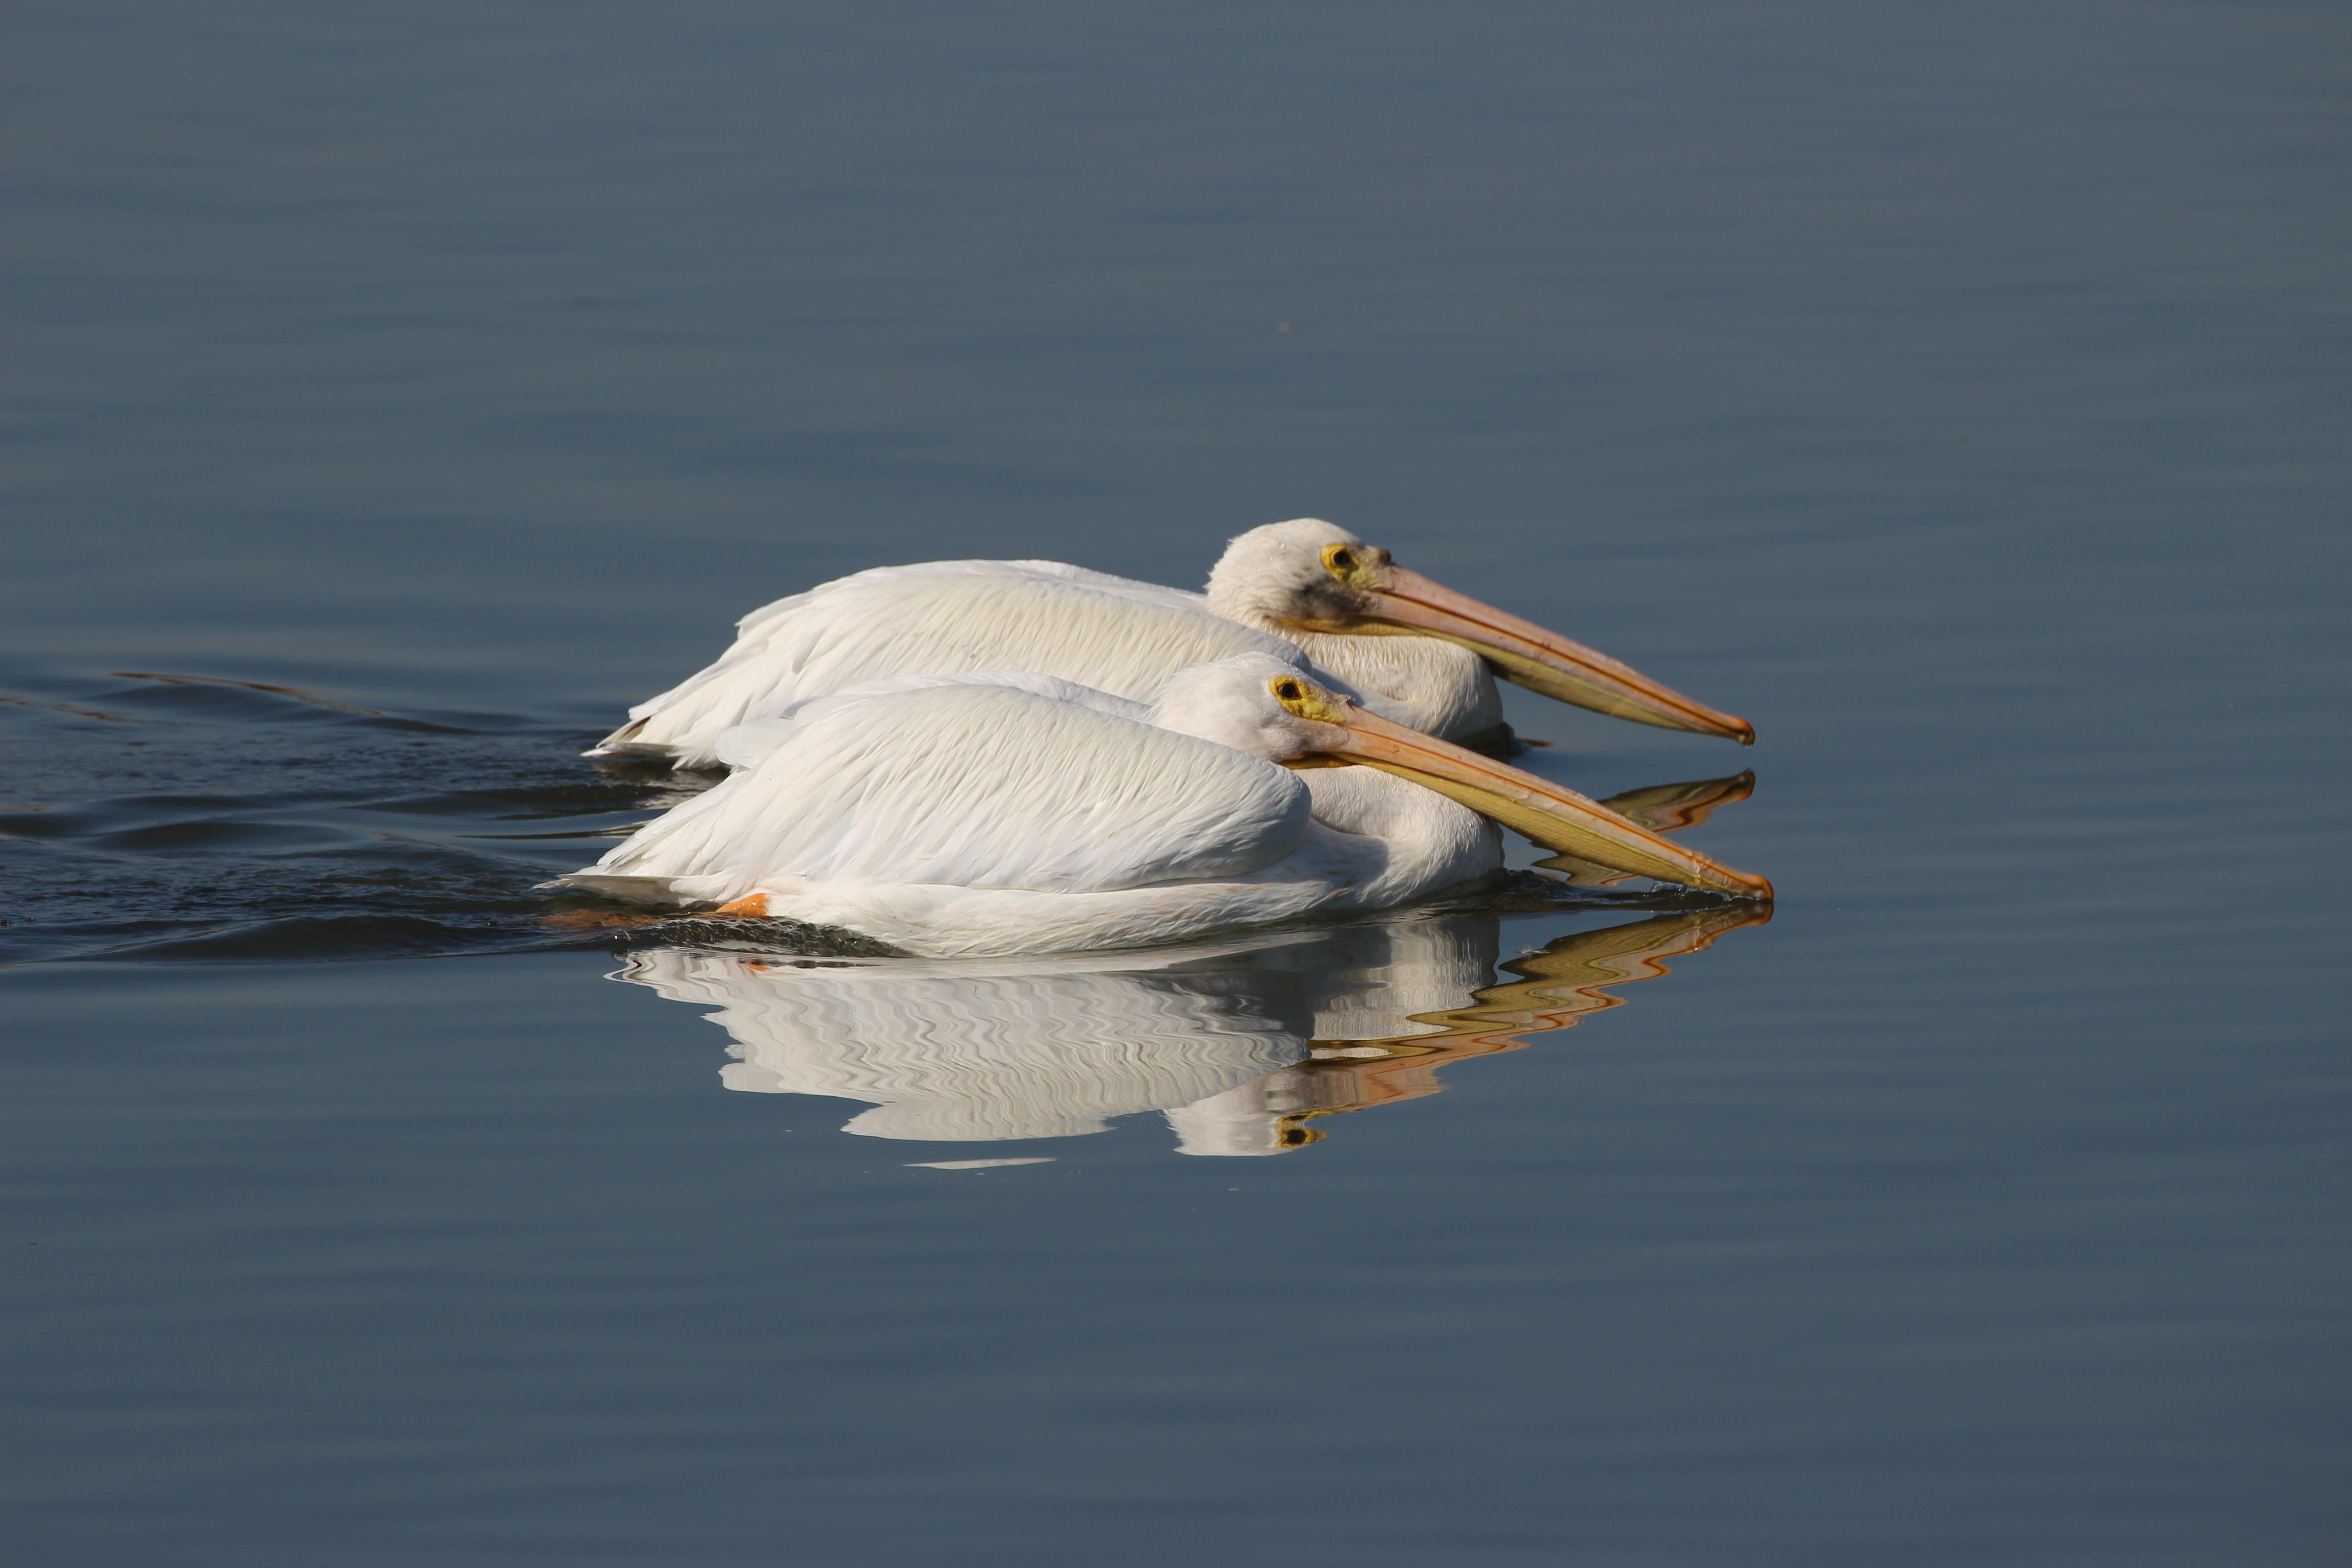

In [10]:
best_pelican = best_pelican_at_the_top.column('photo').item(0)[12:-8]
from IPython import display
display.Image(best_pelican)

## The LOSER!

Assuming the table above is sorted properly, running the cell below should should you the worst pelican as determined by Apple.

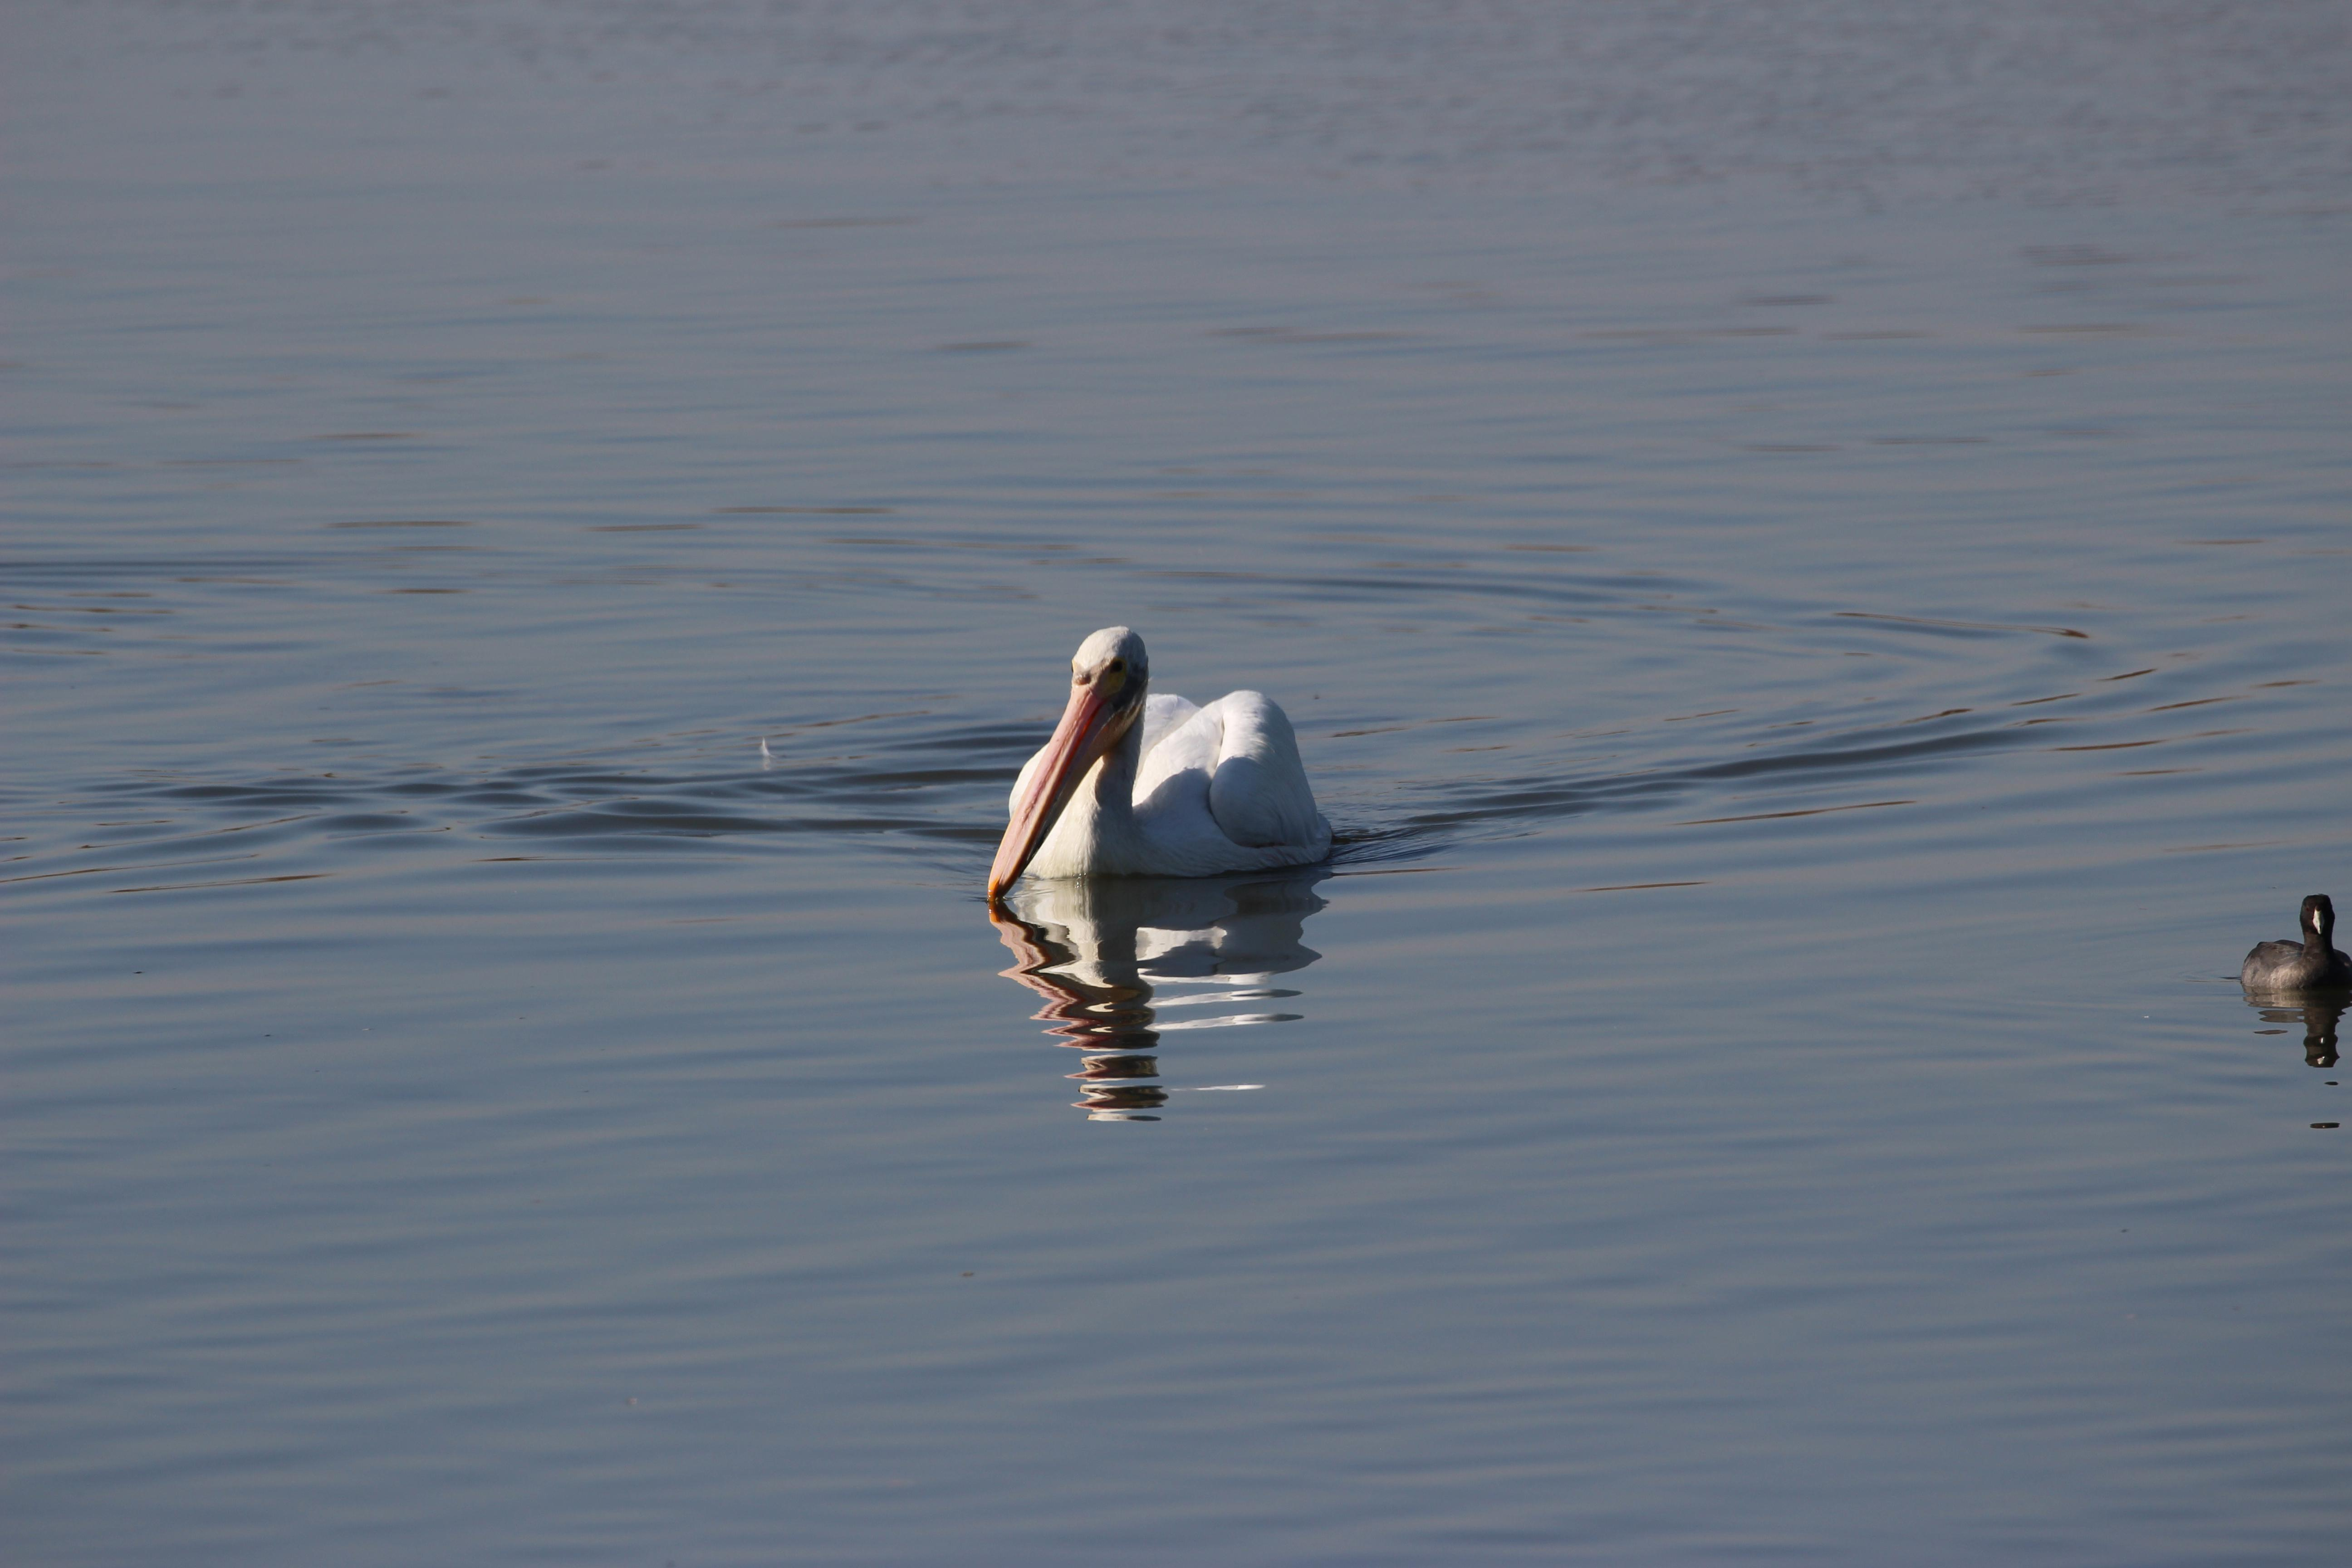

In [11]:
best_pelican = best_pelican_at_the_top.column('photo').item(-1)[12:-8]
from IPython import display
display.Image(best_pelican)